# House Price Prediction with Neural Networks
This notebook demonstrates a complete pipeline for predicting house prices using a neural network. The process includes data loading, preprocessing, model building, training, evaluation, and visualization.

## 1. Import Libraries
We start by importing the necessary libraries for data manipulation, model building, and evaluation.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

## 2. Load and Explore Data
We load the dataset from a CSV file and display the first few rows to understand its structure.

In [23]:
# File path in Colab
file_path = '/content/Housing.csv'

# Load the dataset
data = pd.read_csv(file_path)
data.head()  # Display the first few rows of the dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 3. Data Preprocessing
In this section, we separate the features and the target variable, identify numerical and categorical columns, and define a preprocessing pipeline that scales numerical features and encodes categorical features.

In [24]:
# Separate features and target
X = data.drop(['price'], axis=1)
y = data['price']

# Identify numerical and categorical columns
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

## 4. Model Building
We define a neural network model with multiple layers, including dropout layers for regularization. The model is compiled with the Adam optimizer and mean squared error loss function.

In [29]:
# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

## 5. Model Training
The model is trained using the training data. Early stopping is used to prevent overfitting, monitoring the validation loss to determine the optimal stopping point.

In [31]:

# Train the model
history = model.fit(X_train_preprocessed, y_train, validation_data=(X_test_preprocessed, y_test),
                    epochs=300, batch_size=32)

Epoch 1/300
14/14 [==============================] - 0s 29ms/step - loss: 1320528642048.0000 - root_mean_squared_error: 1149142.6250 - val_loss: 1917442981888.0000 - val_root_mean_squared_error: 1384717.6250
Epoch 2/300
14/14 [==============================] - 0s 19ms/step - loss: 1443012411392.0000 - root_mean_squared_error: 1201254.5000 - val_loss: 1803521359872.0000 - val_root_mean_squared_error: 1342952.5000
Epoch 3/300
14/14 [==============================] - 0s 25ms/step - loss: 1632505954304.0000 - root_mean_squared_error: 1277695.6250 - val_loss: 1879869751296.0000 - val_root_mean_squared_error: 1371083.3750
Epoch 4/300
14/14 [==============================] - 0s 11ms/step - loss: 1459260358656.0000 - root_mean_squared_error: 1207998.5000 - val_loss: 1796957929472.0000 - val_root_mean_squared_error: 1340506.6250
Epoch 5/300
14/14 [==============================] - 0s 11ms/step - loss: 1436305195008.0000 - root_mean_squared_error: 1198459.5000 - val_loss: 1877536669696.0000 - va

## 6. Model Evaluation
Finally, we evaluate the model's performance on the test set by calculating the Root Mean Squared Error (RMSE), a common metric for regression problems.

In [27]:
# Evaluate the model
val_loss, val_rmse = model.evaluate(X_test_preprocessed, y_test, verbose=0)
print(f'Test RMSE: {val_rmse}')

Test RMSE: 1332467.75


## 7. Plotting Actual vs Predicted Prices
In this section, we visualize the actual vs predicted prices using a line plot for better comparison.

4/4 [==============================] - 0s 4ms/step


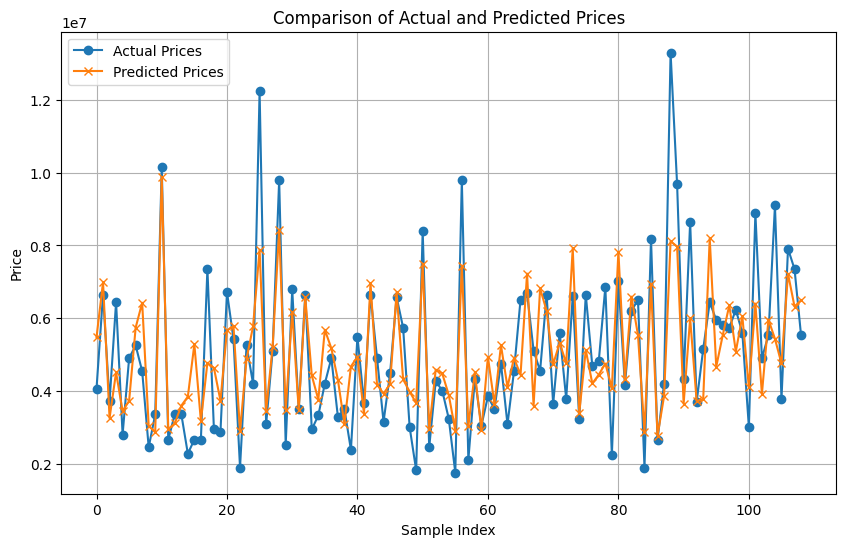

In [28]:
# Predict on the test data
y_pred = model.predict(X_test_preprocessed).flatten()

# Plotting actual vs predicted prices with two lines
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', marker='o')
plt.plot(y_pred, label='Predicted Prices', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Comparison of Actual and Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()